## Income: Over or Less $50,000

__Author:__ [Jocaz Ayrand G. Entico](https://www.linkedin.com/in/jocaz-entico-4675b9144/)

### Executive Summary
<p style="text-align: justify">In this notebook, we will be predicting whether the income of an adult individual exceeds  $50,000 based on the data collected by Barry Becker from the 1994 Census database. In this notebook, we will be implementing two machine learning model. First, we will use Lasso Regression so that we can reduce the number of features to be selected by choosing the variables with relatively high weight versus the others. Second, we will be using k Nearest Neighbor Classification to forecast the income, whether it exceeds USD 50,000, since the variable that we are trying to predict is categorical. <br>
Before using kNN algorithm, we need to identify our target variable and the features that will be used in the model. Target is the variable that we are trying to predict while the features are the predictors of the model. [kNN Classification](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is one of the simplest machine learning algorithm which classifies discrete target variable. The target in this dataset is to determine whether an individual's income exceeds USD 50,000. The accuracy of the selected model can be measured and we want to maximize this as high as possible by finding the optimal number of nearest neighbors.</p>

### Let's Start!

Let's begin by providing all the libraries to be used in this notebook.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn #library provided by amueller
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from collections import Counter

### Data Description
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

__Attribute Information:__ <br>
age: continuous. <br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous. <br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>
education-num: continuous. <br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>
sex: Female, Male. <br>
capital-gain: continuous. <br>
capital-loss: continuous. <br>
hours-per-week: continuous. <br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. <br>

In [2]:
df = pd.read_csv('adult.data.csv', header=None)

In [3]:
header = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
          'marital-status', 'occupation', 'relationship', 'race', 'sex',
          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Target']
df.columns = header
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Processing

In [4]:
df = pd.get_dummies(df)

By using the method *get_dummies*, all categorical variables will be convert to numerical variables consists of 1's and 0's. This method is called [One-Hot Encoding](https://en.wikipedia.org/wiki/One-hot).

In [5]:
df_features = df.iloc[:,:-2]
df_features.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will be dropping the last two columns since this contains the target variable for the dataset.

In [6]:
drop_columns = ['workclass_ ?', 'occupation_ ?', 'native-country_ ?']
df_features = df_features.drop(drop_columns, axis=1)
df_features.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We could observe that there are some of the rows where the input is '?'. Thus, we will be removing the columns that contains '?' in their column name to solve this issue.

### Exploratory Data Analysis

In [7]:
state_counts = Counter(df['Target_ >50K'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
num = (df_state[0]/df_state[0].sum())**2

In [8]:
df_state.columns = ["Person's Income"]

Population per class:    Person's Income
0            24720
1             7841



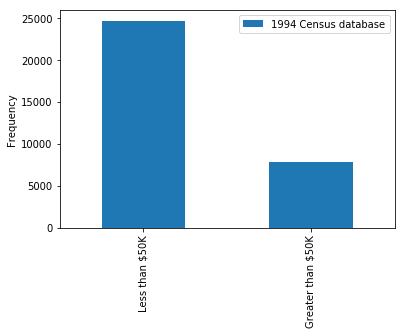

In [9]:
ax = df_state.plot(kind='bar')
ax.legend(['1994 Census database'])
ax.set_ylabel('Frequency')
print("Population per class: {}\n".format(df_state))
ax.set_xticklabels(['Less than $50K', 'Greater than $50K']);

In this dataset, there are __24720__ individuals with less than $\$50,000$ income, and __7841__ individuals with greater than $\$50,000$ income.

In [10]:
print("1.25 * Proportion Chance Criterion: {}%".format(1.25*100*num.sum()))

1.25 * Proportion Chance Criterion: 79.29492137783143%


The minimum accuracy a classifier must have for the classification is __79.29%__ for it to be considered significant.

### Model Simulation

### Plot of the First Simulation

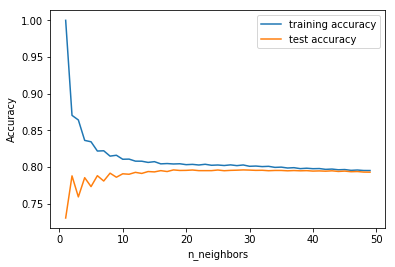

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    df['Target_ >50K'],
                                                    test_size=0.25,
                                                    random_state=7)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

In [12]:
print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy))+1)

0.7963395160299718
18


Using all the features which consists of __105__ features, the optimal n_neighbors is __18__ with test accuracy of __79.63%__.

### Feature Selection

We will be implementing Lasso Regression to find the features to be used in the model selected which is k Nearest Neighbor Classification.

training set score: 0.346005
test set score: 0.342978


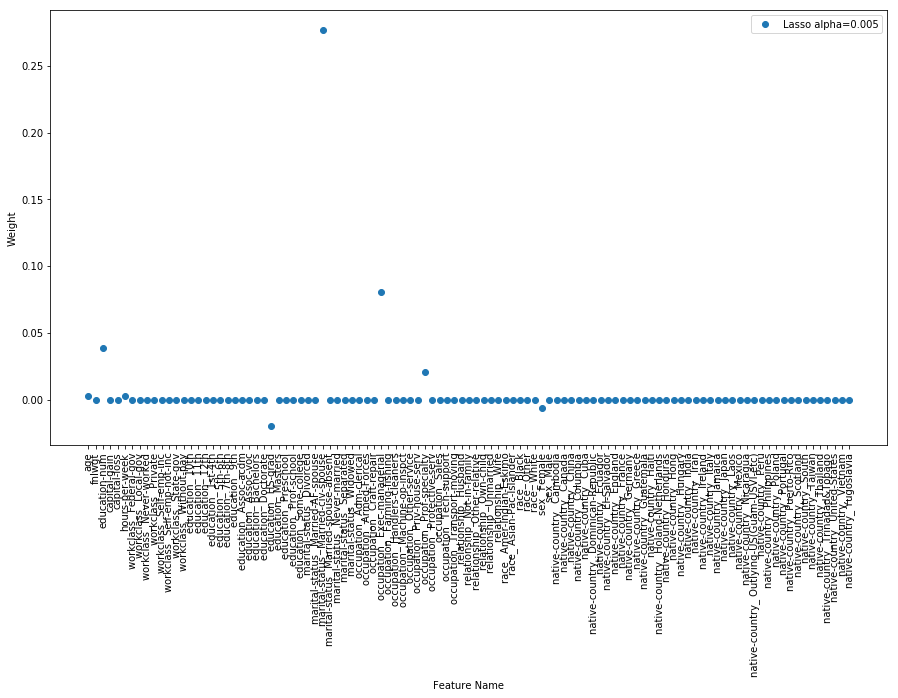

In [13]:
lasso10 = Lasso(alpha=0.005, max_iter=10000).fit(X_train, y_train)
fig = plt.figure(figsize=(15, 8))

plt.plot(lasso10.coef_, 'o', label="Lasso alpha=0.005")
plt.legend()
plt.xticks(range(df_features.shape[1]), df_features.columns, rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Weight');
print("training set score: %f" % lasso10.score(X_train, y_train))
print("test set score: %f" % lasso10.score(X_test, y_test))

Based on the plot above, there are 3 notable features with relatively high weights compared to others. Additionally, we will be adding the features **capital-gain** and **capital-loss** since logically these variable affects the income of an individual. Thus, we will be using the following variables **(education-num, marital-status_ Married-civ-spouse, occupation_ Exec-managerial, capital-gain, capital-loss)** as the features to be used in the next simulation. In effect, we reduced the number of features used instead of using all the features.

### Plot of the Second Simulation

In [14]:
selected_columns = ['education-num', 'marital-status_ Married-civ-spouse',
                    'occupation_ Exec-managerial', 'capital-gain',
                    'capital-loss']
df_features1 = df[selected_columns]

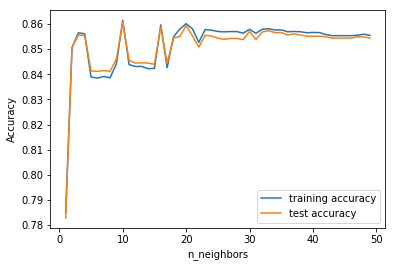

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_features1,
                                                    df['Target_ >50K'],
                                                    test_size=0.25,
                                                    random_state=7)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 50)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

In [16]:
print(max(test_accuracy))
print(test_accuracy.index(max(test_accuracy))+1)

0.8608279081193957
10


Using only __5__ features, the optimal n_neighbors is __10__ with test accuracy of __86.08%__.

### Results
<p style="text-align: justify">We observed that the optimal number of *n_neighbors* is __10__ when using k-NN classification given that we are using selected features for the model with the accuracy of __86.08%__. The features were selected by performing Lasso Regression with $\alpha=0.05$. The variables with relatively high weights compared to others were selected as features for the model. The selected features were education-num, marital-status Married-civ-spouse, occupation Exec-managerial, capital-gain, and capital-loss.</p>
<p style="text-align: justify">With this model, we determined that educational attainment affects the income of an individual. Moreover, married people have higher income maybe because of the tax collected in their income which is less than people who are not married. Furthermore, the income is correlated to the job position of an individual and we can that executive managerial positions have income of greater than $50,000 by looking at the features used in the model. Lastly, if there is an increase in the capital of an individual, then this would reflect to their income.

### Limitations

In this notebook, we only used one random seed for the simulation. In effect, the results only captures the demographics provided by the dataset and it can only predict with respect to that instance.

### References
1. UCI Machine Learning Repository: Census Income Data Set. (2018). Archive.ics.uci.edu. 
2. Monterola, Chris. K-Nearest Neighbor Classification. Asian Institute of Management 2018